In [17]:
import os
import sys
import csv
import gzip

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

%matplotlib inline

In [8]:
path_to_gtex_data = '../data/GTEx_Analysis_v8_eQTL/'

sig_pair_files = sorted([f for f in os.listdir(path_to_gtex_data) if f.endswith('signif_variant_gene_pairs.txt.gz')])

In [48]:
chosen_tissue_files = [
 'Esophagus_Gastroesophageal_Junction.v8.signif_variant_gene_pairs.txt.gz',
 'Esophagus_Mucosa.v8.signif_variant_gene_pairs.txt.gz',
 'Esophagus_Muscularis.v8.signif_variant_gene_pairs.txt.gz',
 'Lung.v8.signif_variant_gene_pairs.txt.gz',
 'Artery_Aorta.v8.signif_variant_gene_pairs.txt.gz',
 'Artery_Coronary.v8.signif_variant_gene_pairs.txt.gz',
 'Artery_Tibial.v8.signif_variant_gene_pairs.txt.gz',
 'Heart_Left_Ventricle.v8.signif_variant_gene_pairs.txt.gz',
 'Heart_Atrial_Appendage.v8.signif_variant_gene_pairs.txt.gz',
]

In [ ]:
tissue_to_distances = dict()

for sig_pair_file in chosen_tissue_files:
    
    print(sig_pair_file)
    
    fh = gzip.open(os.path.join(path_to_gtex_data, sig_pair_file), 'rt')
    reader = csv.reader(fh, delimiter='\t')
    header = next(reader)
    
    sig_tss_distances = list()
    for row in tqdm(reader):
        row = dict(zip(header, row))
        if row['pval_nominal'] < row['pval_nominal_threshold']:
            sig_tss_distances.append(int(row['tss_distance']))
    
    tissue_to_distances[sig_pair_file.split('.')[0]] = sig_tss_distances

len(tissue_to_distances)

In [ ]:
tissue_to_xy = dict()
for tissue, sig_tss_distances in tissue_to_distances.items():
    print(tissue)
    
    x = list()
    y = list()

    for d in tqdm(range(0, 1000000, 10000)):
        y.append(len([1 for i in sig_tss_distances if i <= d])/len(sig_tss_distances))
        x.append(d)

    tissue_to_xy[tissue] = (x,y)

In [ ]:
x = list()
y = list()

for d in tqdm(range(0, 1000000, 10000)):
    y_total = 0
    y_value = 0
    
    for tissue, sig_tss_distances in tissue_to_distances.items():
        
        y_value += len([1 for i in sig_tss_distances if i <= d])
        y_total += len(sig_tss_distances)
        
    y.append(y_value/y_total)
    x.append(d)
        

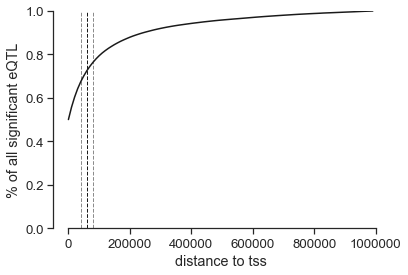

In [65]:
sns.set(style='ticks', font_scale=1.2)  

plt.plot(x, y, 'k-')

    
plt.plot([40000, 40000], [0, 1], 'k--', alpha=0.5, lw=1)
plt.plot([60000, 60000], [0, 1], 'k--', lw=1)
plt.plot([80000, 80000], [0, 1], 'k--', alpha=0.5, lw=1)

plt.ylim(0, 1)
plt.ylabel('% of all significant eQTL')
plt.xlabel('distance to tss')
sns.despine(trim=True)

plt.savefig('figures/r1/percent_of_eqtls_bydistance_gtex_v8.pdf')